In [1]:
# To determine the effect of number of nights on reviewer score
# To determine how mobile usage effects type of trip,type of traveller, type of room, number of nights
# To determine the relationship between nationality and hotel location.
# To determine the relationship between nationality, reviewer score and hotel location
# To determine how negative word and positive word counts reflect reviewer score.
# To determine the relationship between time of year and location of hotel

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
import plotly.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50, 18
rcParams["axes.labelsize"] = 16

/Users/Rizal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#Read CSV file from folder
Table = pd.read_csv('/Users/Rizal/Desktop/MANB 1123 - Statistics/Project/Hotel_Reviews.csv')

In [3]:
# Check the top 5 rows of the dataset
Table.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
#The following line checks the number of unique elements in each column 
Table.nunique()

Hotel_Address                                   1493
Additional_Number_of_Scoring                     480
Review_Date                                      731
Average_Score                                     34
Hotel_Name                                      1492
Reviewer_Nationality                             227
Negative_Review                               330011
Review_Total_Negative_Word_Counts                402
Total_Number_of_Reviews                         1142
Positive_Review                               412601
Review_Total_Positive_Word_Counts                365
Total_Number_of_Reviews_Reviewer_Has_Given       198
Reviewer_Score                                    37
Tags                                           55242
days_since_review                                731
lat                                             1472
lng                                             1472
dtype: int64

In [22]:
#classify type of trip (leisure, other or business) based on Tag column
def check_trip(input):
    if 'leisure' in input.lower():
        return 'Leisure Trip'
    elif 'business' in input.lower():
        return 'Business Trip'
    else:
        return 'Not stated'

# use function declared above to move type of trip from 'Tags' column to a separate table
Table['Type_of_Trip'] = Table['Tags'].apply(lambda x:check_trip(x))
# use value_counts() to look at data
Table['Type_of_Trip'].value_counts()



Leisure Trip     417790
Business Trip     82960
Not stated        14988
Name: Type_of_Trip, dtype: int64

In [23]:
# The following lines declare a function called check_traveller that takes an input, detect specific phrases that
# relates to the type of traveller such as couple, family with children, etc.
def check_traveller(input):
    if 'couple' in input.lower():
        return 'Couple'
    elif 'family with young children' in input.lower():
        return 'Family with young children'
    elif 'family with older children' in input.lower():
        return 'Family with older children'
    elif 'couple' in input.lower():
        return 'Couple'
    elif 'solo traveler' in input.lower():
        return 'Solo'
    elif 'Group':
        return 'Group'
    else:
        return 'Others'

# The following lines create a column in Table dataframe called 'Traveller_Type, uses the function check_traveller
# to scrape through the column 'Tags' for phrases related to type of traveller, and counts type of traveller
Table['Traveller_Type'] = Table['Tags'].apply(lambda x: check_traveller(x))
Table['Traveller_Type'].value_counts()

Couple                        252294
Solo                          108545
Group                          67535
Family with young children     61015
Family with older children     26349
Name: Traveller_Type, dtype: int64

In [24]:
# Having a hard time trying to think of a way to standardize the type of rooms
# as different hotel has different name for type of room they offer

# I'll return to think of a better way to classify these. 


# The following lines declare a function called check_room and check for specific phrases
# to be classified into type of room
def check_room(input):
    if 'double' in input.lower():
        return 'Double'
    elif 'king' in input.lower():
        return 'King'
    elif 'twin' in input.lower():
        return 'Twin'
    elif 'queen' in input.lower():
        return 'Queen'
    elif '2 rooms'  in input.lower():
        return '2 rooms'
    elif '3 rooms' in input.lower():
        return '3 rooms'
    elif '4 rooms' in input.lower():
        return '4 rooms'
    elif '5 rooms' in input.lower():
        return '4 rooms'
    elif 'single' in input.lower():
        return 'Single'
    elif 'triple' in input.lower():
        return 'Triple'
    elif 'loft' in input.lower():
        return 'Loft'
    elif 'suite' in input.lower():
        return 'Suite'
    elif 'ambassador' in input.lower():
        return 'Ambassador'
    elif 'cosy' in input.lower():
        return 'Cosy'
    else:
        return 'Others'

# The following line creates a column called Room_Type and utilizes the recently declared
# check_room function and add the type of room into the column, then count for each type of room.

Table['Room_Type'] = Table['Tags'].apply(lambda x: check_room(x))
Table['Room_Type'].value_counts()

Double        303262
Others         42037
Twin           41217
King           38328
Queen          28217
Single         24771
Suite          15237
2 rooms        12393
Triple          9544
3 rooms          474
Loft             110
Cosy              96
4 rooms           43
Ambassador         9
Name: Room_Type, dtype: int64

In [25]:
#check_night function checks for number of nights by checking for phrases that has the sentence 
#'Stayed # night' or 'Stayed # nights' and return a singular integer(number) reflecting the number of nights.
def check_night(input):
    if 'Stayed 1 night' in input:
        return 1
    elif 'Stayed 2 nights' in input:
        return 2
    elif 'Stayed 3 nights' in input:
        return 3
    elif 'Stayed 4 nights' in input:
        return 4
    elif 'Stayed 5 nights' in input:
        return 5
    elif 'Stayed 6 nights' in input:
        return 6
    elif 'Stayed 7 nights' in input:
        return 7
    elif 'Stayed 8 nights' in input:
        return 8
    elif 'Stayed 9 nights' in input:
        return 9
    elif 'Stayed 10 nights' in input:
        return 10
    elif 'Stayed 11 nights' in input:
        return 11
    elif 'Stayed 12 nights' in input:
        return 12
    elif 'Stayed 13 nights' in input:
        return 13
    elif 'Stayed 14 nights' in input:
        return 14
    elif 'Stayed 15 nights' in input:
        return 15
    elif 'Stayed 16 nights' in input:
        return 16
    elif 'Stayed 17 nights' in input:
        return 17
    elif 'Stayed 18 nights' in input:
        return 18
    elif 'Stayed 19 nights' in input:
        return 19
    elif 'Stayed 20 nights' in input:
        return 20
    elif 'Stayed 21 nights' in input:
        return 21
    elif 'Stayed 22 nights' in input:
        return 22
    elif 'Stayed 23 nights' in input:
        return 23
    elif 'Stayed 24 nights' in input:
        return 24
    elif 'Stayed 25 nights' in input:
        return 25
    elif 'Stayed 26 nights' in input:
        return 26
    elif 'Stayed 27 nights' in input:
        return 27
    elif 'Stayed 28 nights' in input:
        return 28
    elif 'Stayed 29 nights' in input:
        return 29
    elif 'Stayed 30 nights' in input:
        return 30
    else:
        return np.nan
    
#The following lines create a new column called 'Number_of_Night' and utilizes the check_night function above
#to add the number of nights into the recently created column 'Number_of_Night'
Table['Number_of_Night'] = Table['Tags'].apply(lambda x: check_night(x))
Table['Number_of_Night'].value_counts(dropna=False)

 1.0     193645
 2.0     133937
 3.0      95821
 4.0      47817
 5.0      20845
 6.0       9776
 7.0       7399
 8.0       2502
 9.0       1293
 10.0       889
 11.0       418
 12.0       316
 14.0       247
 13.0       246
NaN         193
 15.0       117
 16.0        57
 17.0        42
 18.0        33
 19.0        29
 21.0        23
 20.0        19
 30.0        11
 27.0        11
 23.0        10
 22.0        10
 25.0         7
 28.0         7
 26.0         7
 24.0         6
 29.0         5
Name: Number_of_Night, dtype: int64

In [26]:
# Declares a function called check_mobile that checks for the word 'mobile' meaning the person uses a mobile device 
# to access the website, returns 1 if they used mobile devices, and 0 if they dont.
def check_mobile(input):
    if 'mobile' in input.lower():
        return 1
    else:
        return 0
# Utilizes the recently declared check_mobile function to add value 1/0  and create a column called 'Use_Mobile'
Table['Use_Mobile'] = Table['Tags'].apply(lambda x:check_mobile(x))
Table['Use_Mobile'].value_counts()

1    307663
0    208075
Name: Use_Mobile, dtype: int64

In [19]:
Table.groupby(by = 'Hotel_Name').count()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,Reviewer_Score,Tags,days_since_review,lat,lng,Type_of_Trip,Traveller_Type,Room_Type,Number_of_Night,Use_Mobile
Hotel_Name,,,,,,,,,,,,,,,,,,,,,
11 Cadogan Gardens,159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,159,159,159,159
1K Hotel,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
25hours Hotel beim MuseumsQuartier,689,689,689,689,689,689,689,689,689,689,...,689,689,689,689,689,689,689,689,689,689
41,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
45 Park Lane Dorchester Collection,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
88 Studios,459,459,459,459,459,459,459,459,459,459,...,459,459,459,459,459,459,459,459,459,459
9Hotel Republique,183,183,183,183,183,183,183,183,183,183,...,183,183,183,183,183,183,183,183,183,183
A La Villa Madame,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
ABaC Restaurant Hotel Barcelona GL Monumento,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [10]:
Table.to_csv('Hotel.csv')

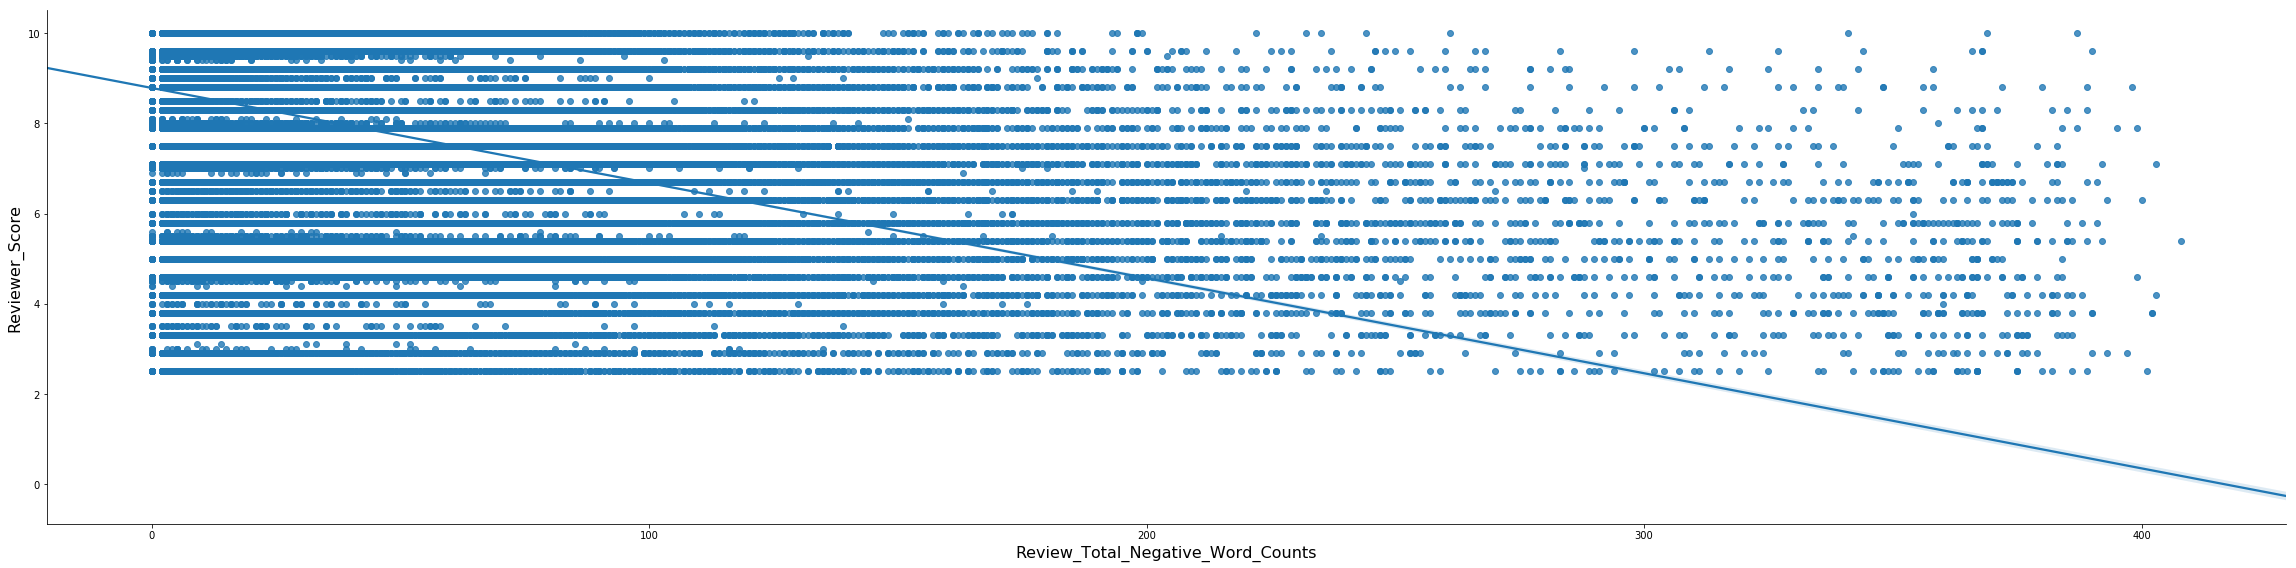

In [21]:
# To determine the effect of negative word counts on reviewer score


sds.lmplot(x='Review_Total_Negative_Word_Counts',y= 'Reviewer_Score',data = Table, size = 8 ,aspect = 4 )


In [22]:
Table[['Review_Total_Negative_Word_Counts','Reviewer_Score']].corr()
#There is a negative linear relationship between 

,Review_Total_Negative_Word_Counts,Reviewer_Score
Review_Total_Negative_Word_Counts,1.000000,-0.382474
Reviewer_Score,-0.382474,1.000000


In [ ]:
sm.ols()

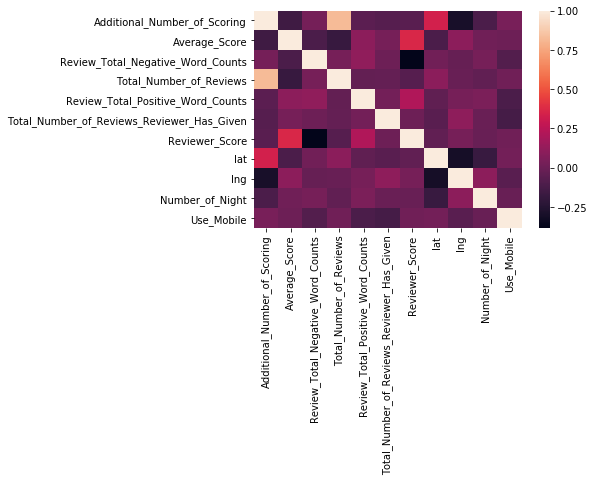

In [122]:
sds.heatmap(Table.corr())

40.345097704648488

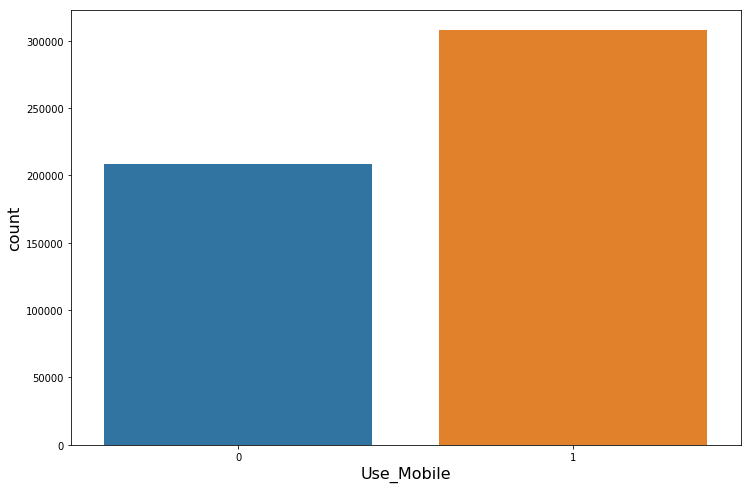

In [40]:
plt.figure(figsize = (12,8))
sns.countplot('Use_Mobile', data = Table)

In [42]:
usingMobile = Table['Use_Mobile'].value_counts().max()/sum(Table['Use_Mobile'].value_counts())*100
usingMobile

59.654902295351519

In [43]:
notusingMobile = Table['Use_Mobile'].value_counts().min()/sum(Table['Use_Mobile'].value_counts())*100
notusingMobile

40.345097704648488

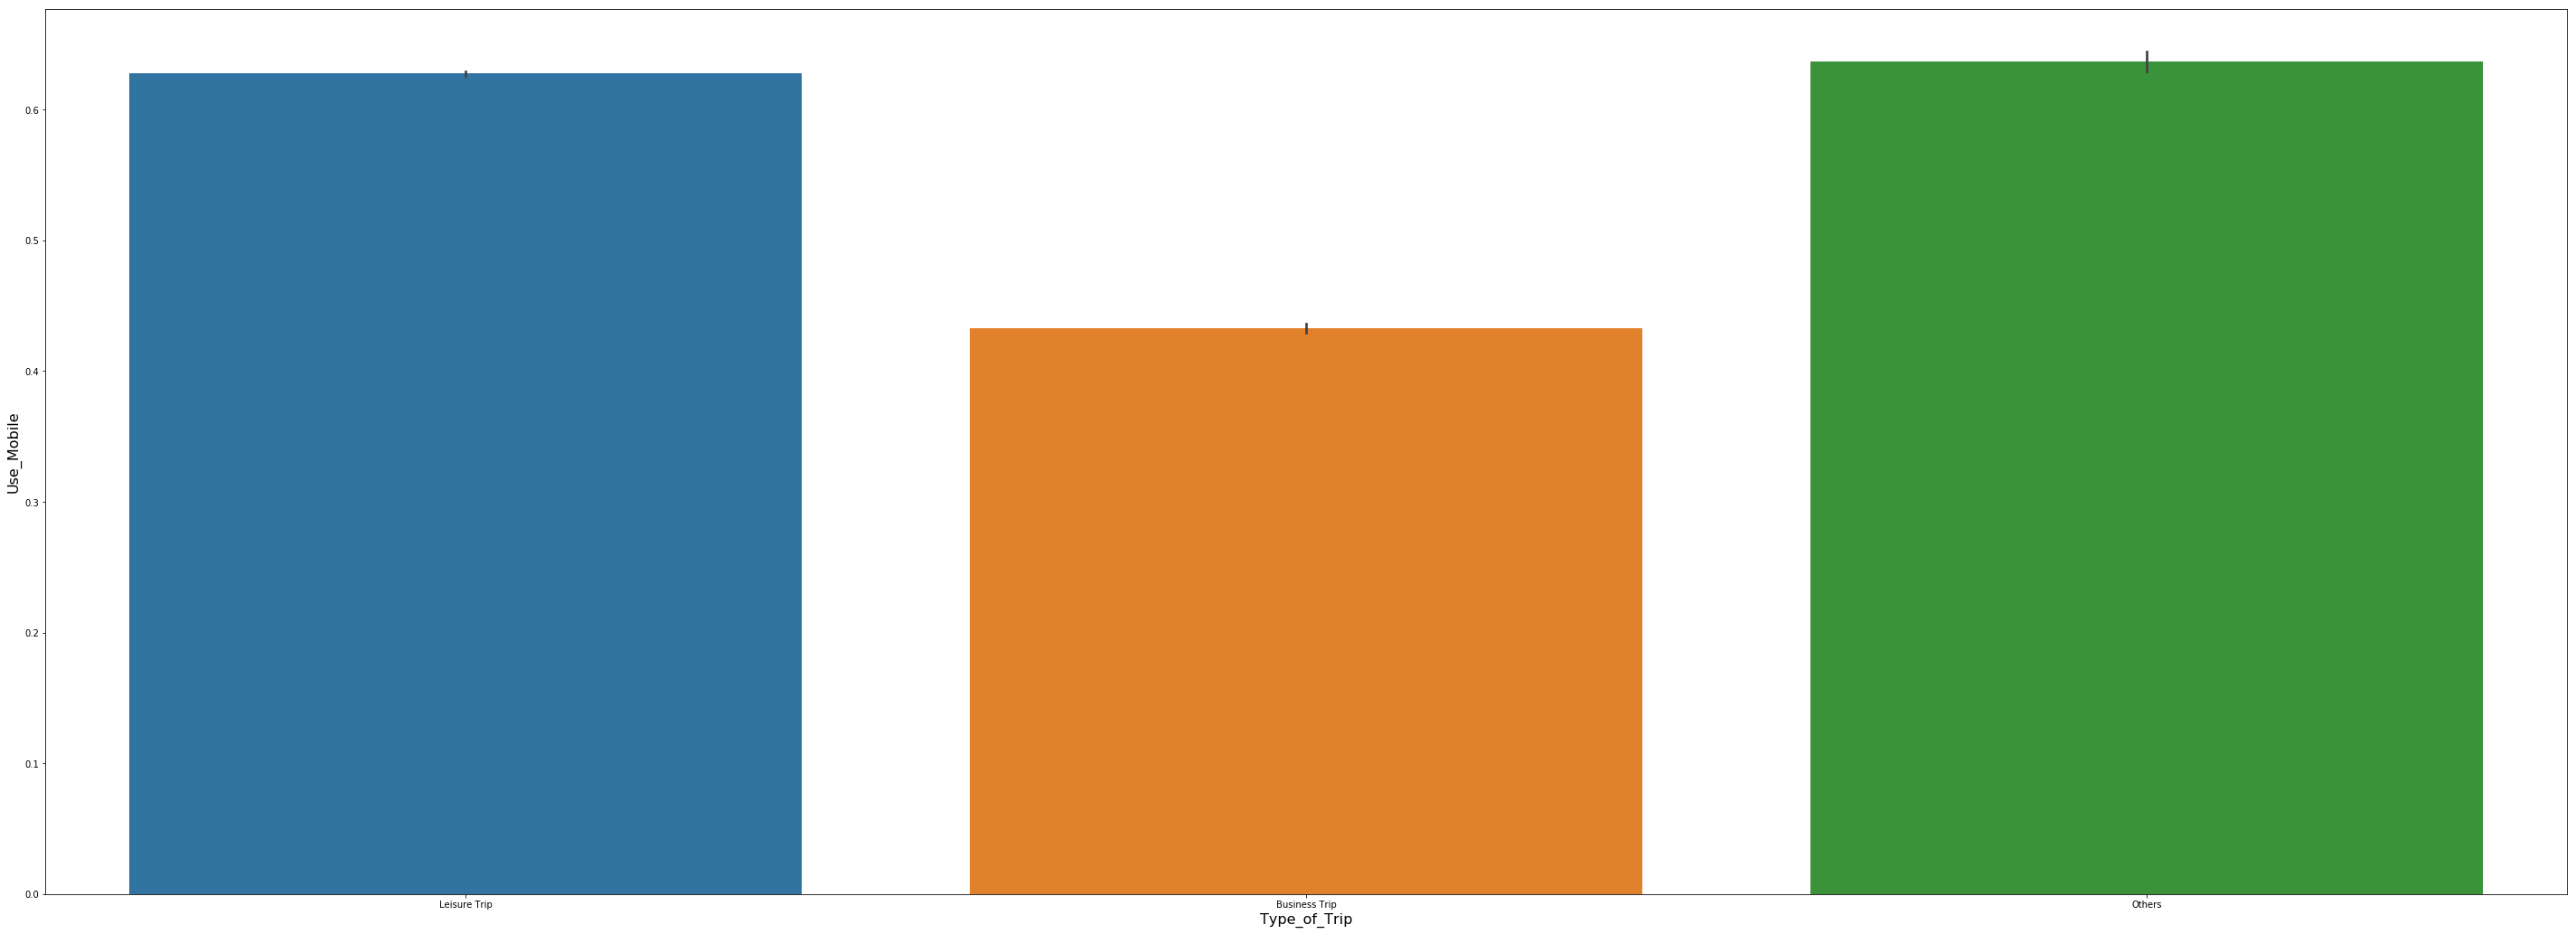

In [177]:
# Roughly 60% of the travellers going on leisure trip use mobile devices to access Booking.com
# Roughly 40% of the travellers going on business trip use mobile devices to access Booking.com
# this is a bad plot, need to know whether these are relevant or not, and how to improve the visualizations
sds.barplot(x = 'Type_of_Trip', y = 'Use_Mobile', data = Table)

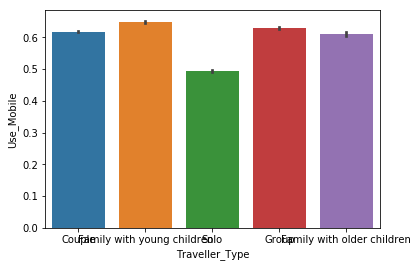

In [166]:
#sds.barplot(x = 'Traveller_Type', y = 'Use_Mobile', data = Table)

In [174]:
#Table.info()
#sds.barplot(x = 'Reviewer_Nationality', y = 'Reviewer_Score', data = Table, estimator = np.mean)

TypeError: string indices must be integers

In [178]:
#idea
'''
Find the top 10 best hotel in europe: Basis of top, find the ratio of positive to negative review.
count number of positive review
count number of negative review
create a function that detects the phrase 'No Negative'. if there is the phrase 'No Negative' = np.nan
create a function that detects the phrase 'No Positive'. if there is the phrase 'No Negative' = np.nan
count number of


sum up positive review, sume up negative review, 
find total number of positive review/total number of negative review



count the num
'''

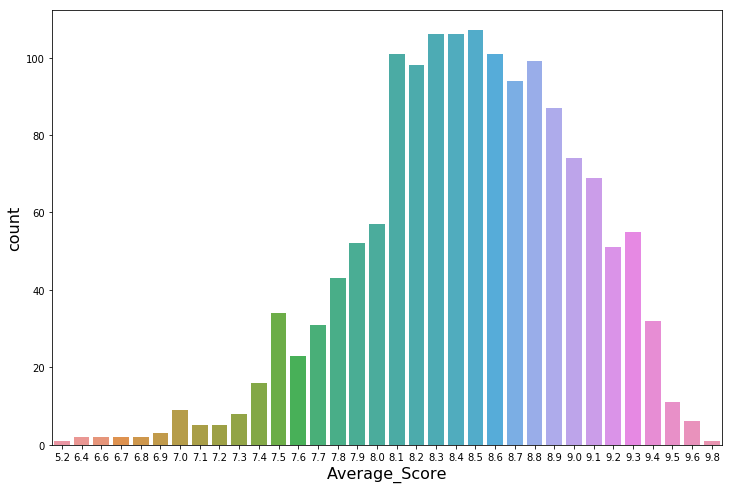

In [48]:
plt.figure(figsize = (12,8))
hotelname_score = Table[['Hotel_Name','Average_Score']].drop_duplicates()
sns.countplot(x = 'Average_Score',data = hotelname_score)

In [49]:
Table['Average_Score'].describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

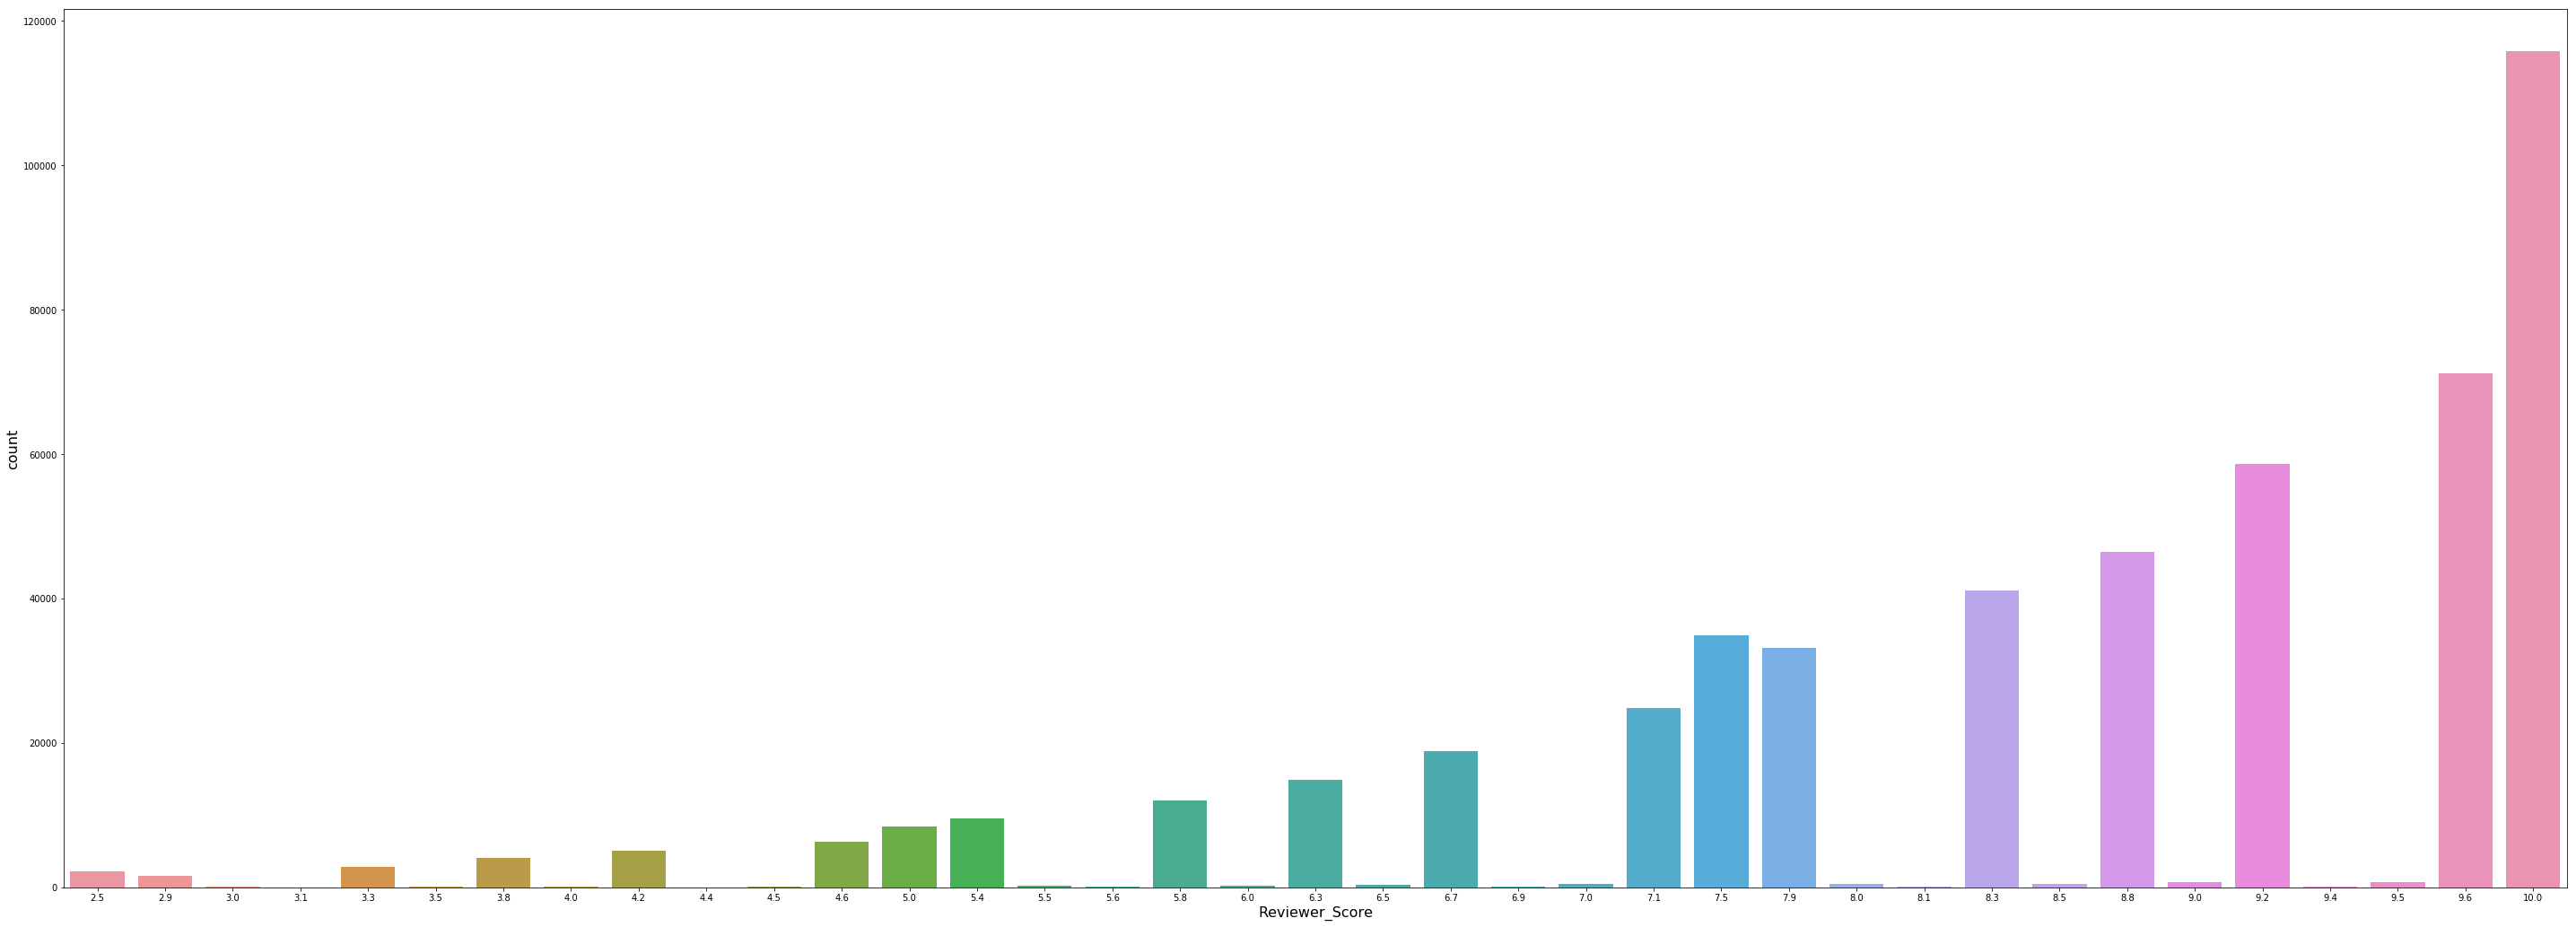

In [46]:
sns.countplot(Table['Reviewer_Score'])

In [47]:
Table['Reviewer_Score'].describe()

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

In [11]:
# Measurement of central tendency
#The mean of the average score of hotel is 8.47
hotelname_score.mean()

Average_Score    8.46718
dtype: float64

In [12]:
# The highest frequency average score is 8.5
hotelname_score['Average_Score'].mode()

0    8.5
dtype: float64

In [13]:
# The standard deviation for the average score is small at 0.548 
# which means that the average distance of the individual data from the mean is small
hotelname_score['Average_Score'].std()

0.5482312703836865

In [14]:
# The standard deviation for the average score is small at 0.30 
# which means that the average distance of the individual data from the mean is small
hotelname_score['Average_Score'].var()

0.3005575258265107

In [46]:
def london_check(input):
    if 'london' in input.lower():
        return 'London'

In [ ]:
def distance_primark(lat,long):

In [53]:
london_only = Table
london_only['city'] = london_only['Hotel_Address'].apply(lambda x:london_check(x))
for_london = london_only[london_only['city'] == 'London']


In [54]:
Table['Number_of_Night'].value_counts()

1.0     193645
2.0     133937
3.0      95821
4.0      47817
5.0      20845
6.0       9776
7.0       7399
8.0       2502
9.0       1293
10.0       889
11.0       418
12.0       316
14.0       247
13.0       246
15.0       117
16.0        57
17.0        42
18.0        33
19.0        29
21.0        23
20.0        19
27.0        11
30.0        11
23.0        10
22.0        10
28.0         7
25.0         7
26.0         7
24.0         6
29.0         5
Name: Number_of_Night, dtype: int64

In [53]:
Table['Number_of_Night'].describe()

count    515545.000000
mean          2.362201
std           1.646618
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          30.000000
Name: Number_of_Night, dtype: float64

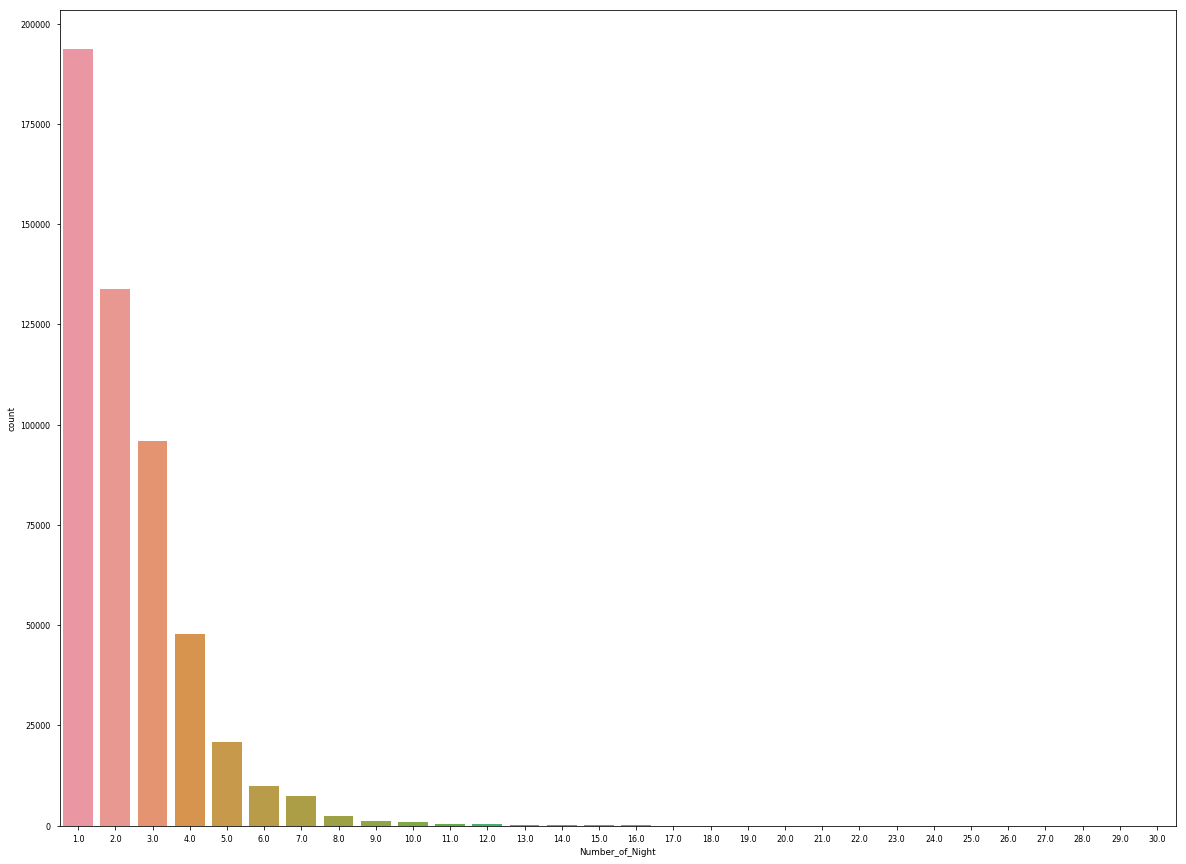

In [13]:
plt.subplots(figsize=(20,15))
sds.countplot(Table['Number_of_Night'].dropna().astype(str).astype(float))

In [15]:
Table.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Reviewer_Score,Tags,days_since_review,lat,lng,Type_of_Trip,Traveller_Type,Room_Type,Number_of_Night,Use_Mobile
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Leisure Trip,Couple,Double,6.0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Leisure Trip,Couple,Double,4.0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Leisure Trip,Family with young children,Double,3.0,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Leisure Trip,Solo,Double,3.0,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Leisure Trip,Couple,Suite,2.0,1


In [36]:
# Popularity count for hotel for Business Trip traveller.
Business_Trip = Table[Table['Type_of_Trip'] == 'Business Trip']
#Business_Trip.groupby(by = 'Hotel_Name')
Business_Trip.groupby(by = 'Hotel_Name').count().sort_values(by = 'Positive_Review',ascending = False)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,Reviewer_Score,Tags,days_since_review,lat,lng,Type_of_Trip,Traveller_Type,Room_Type,Number_of_Night,Use_Mobile
Hotel_Name,,,,,,,,,,,,,,,,,,,,,
Britannia International Hotel Canary Wharf,1441,1441,1441,1441,1441,1441,1441,1441,1441,1441,...,1441,1441,1441,1441,1441,1441,1441,1441,1438,1441
Strand Palace Hotel,721,721,721,721,721,721,721,721,721,721,...,721,721,721,721,721,721,721,721,721,721
Park Plaza Westminster Bridge London,542,542,542,542,542,542,542,542,542,542,...,542,542,542,542,542,542,542,542,541,542
Grand Royale London Hyde Park,538,538,538,538,538,538,538,538,538,538,...,538,538,538,538,538,538,538,538,538,538
Copthorne Tara Hotel London Kensington,522,522,522,522,522,522,522,522,522,522,...,522,522,522,522,522,522,522,522,522,522
Holiday Inn London Kensington,505,505,505,505,505,505,505,505,505,505,...,505,505,505,505,505,505,505,505,505,505
Park Grand Paddington Court,497,497,497,497,497,497,497,497,497,497,...,497,497,497,497,497,497,497,497,497,497
citizenM Tower of London,475,475,475,475,475,475,475,475,475,475,...,475,475,475,475,475,475,475,475,475,475
Hilton London Metropole,443,443,443,443,443,443,443,443,443,443,...,443,443,443,443,443,443,443,443,443,443


In [37]:
# Popularity count for hotel for Business Trip traveller.
Business_Trip = Table[Table['Type_of_Trip'] == 'Leisure Trip']
#Business_Trip.groupby(by = 'Hotel_Name')
Business_Trip.groupby(by = 'Hotel_Name').count().sort_values(by = 'Positive_Review',ascending = False)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,Reviewer_Score,Tags,days_since_review,lat,lng,Type_of_Trip,Traveller_Type,Room_Type,Number_of_Night,Use_Mobile
Hotel_Name,,,,,,,,,,,,,,,,,,,,,
Park Plaza Westminster Bridge London,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,...,3501,3501,3501,3501,3501,3501,3501,3501,3500,3501
Strand Palace Hotel,3460,3460,3460,3460,3460,3460,3460,3460,3460,3460,...,3460,3460,3460,3460,3460,3460,3460,3460,3459,3460
Britannia International Hotel Canary Wharf,3109,3109,3109,3109,3109,3109,3109,3109,3109,3109,...,3109,3109,3109,3109,3109,3109,3109,3109,3105,3109
Copthorne Tara Hotel London Kensington,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955,...,2955,2955,2955,2955,2955,2955,2955,2955,2953,2955
DoubleTree by Hilton Hotel London Tower of London,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,...,2853,2853,2853,2853,2853,2853,2853,2853,2852,2853
Intercontinental London The O2,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388,...,2388,2388,2388,2388,2388,2388,2388,2388,2386,2388
Grand Royale London Hyde Park,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321,...,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321
Holiday Inn London Kensington,2161,2161,2161,2161,2161,2161,2161,2161,2161,2161,...,2161,2161,2161,2161,2161,2161,2161,2161,2160,2161
Hilton London Metropole,2086,2086,2086,2086,2086,2086,2086,2086,2086,2086,...,2086,2086,2086,2086,2086,2086,2086,2086,2086,2086


In [ ]:
#20 mar  Spring
#21 Jun Summer
#22 Sep Autumn
#21 Dec

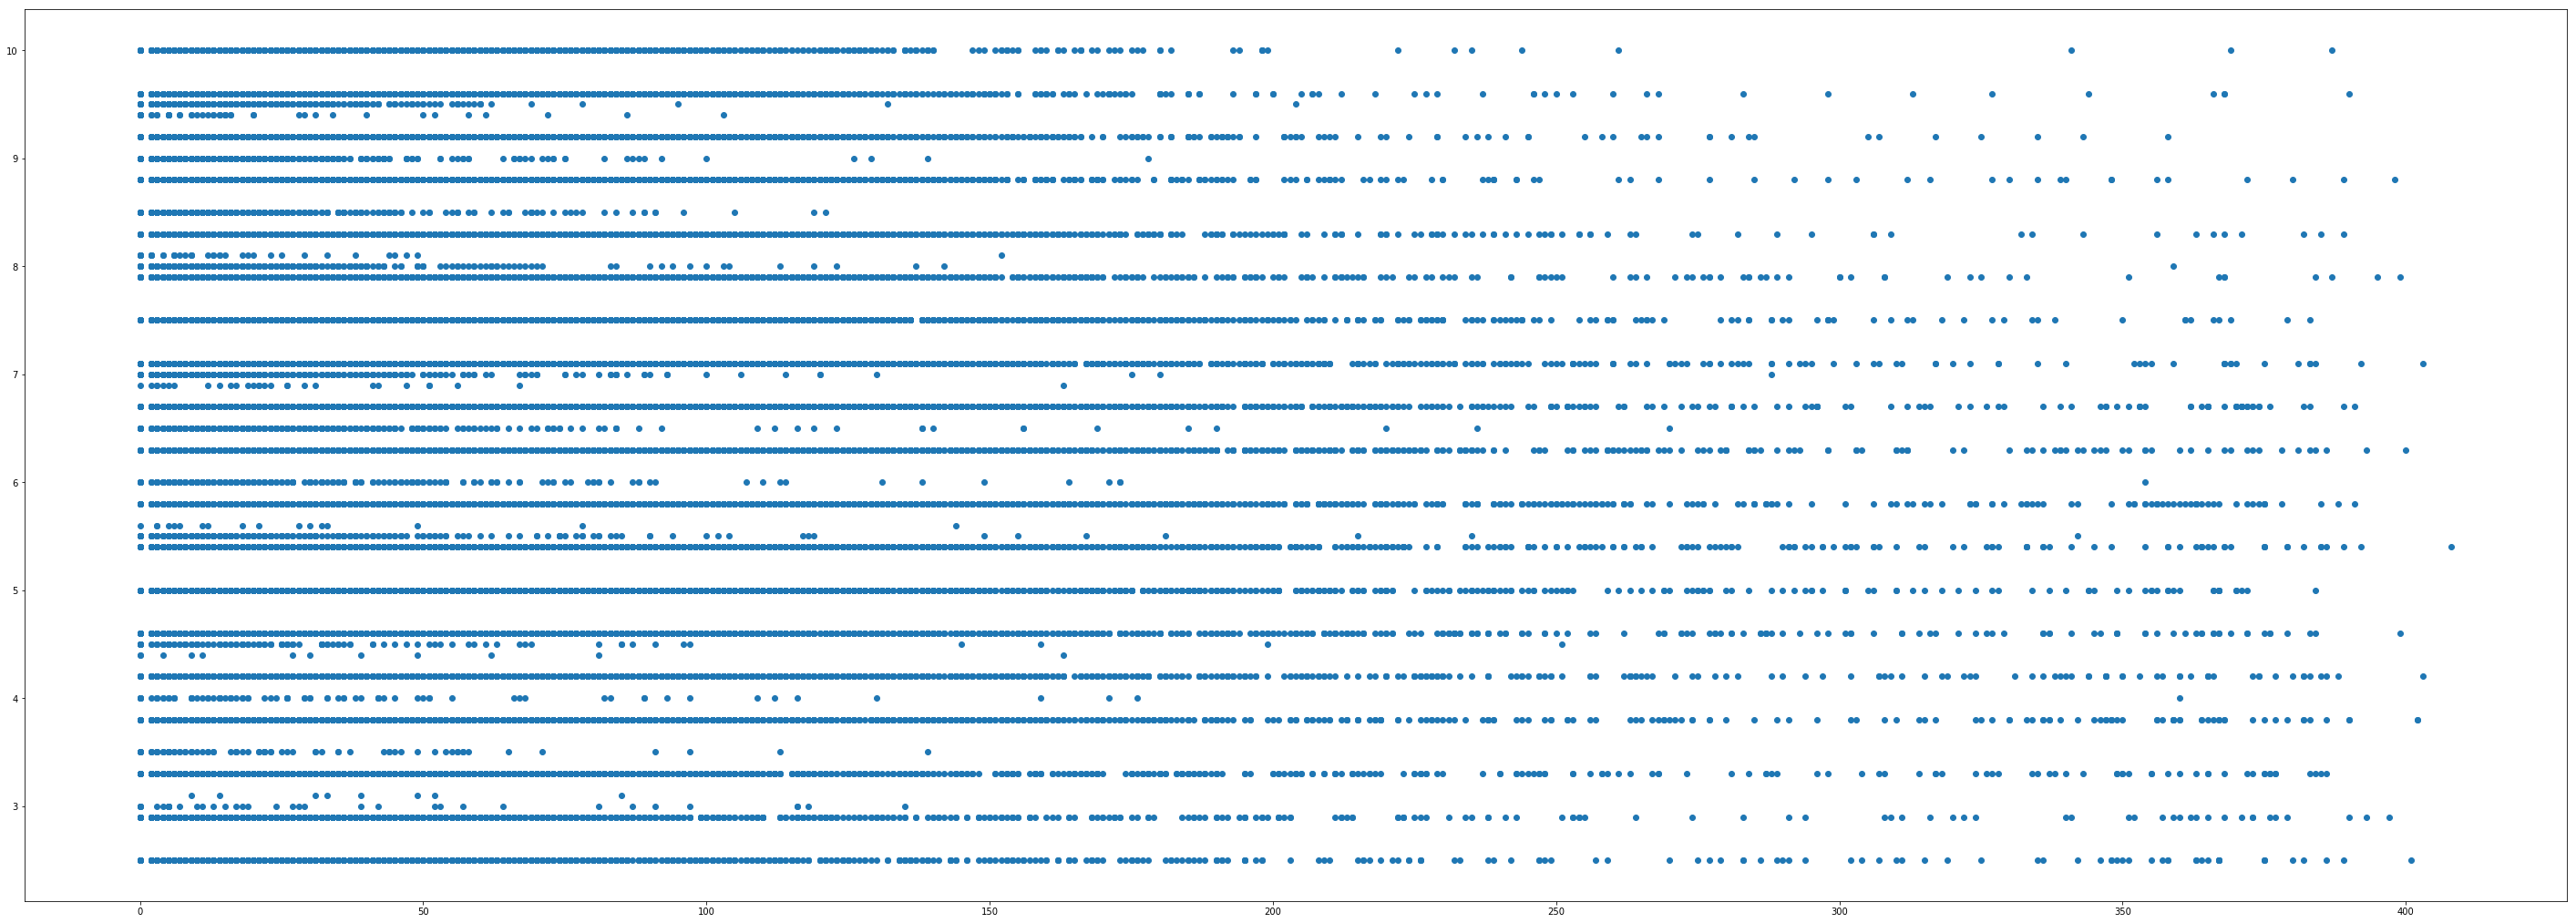

In [7]:
fig = plt.figure(figsize=(18, 8))
fig, ax = plt.subplots()
ax.scatter(x=Table['Review_Total_Negative_Word_Counts'], y = Table['Reviewer_Score'], cmap='RdYlGn')

In [27]:
Table['Hotel_Location']=Table.apply

In [28]:
def check_paris(input):
    if 'Paris' in input:
        return 'Paris'

In [29]:
Table['Hotel_Location']=Table['Hotel_Address'].astype('str').apply(lambda x:check_paris(x))

In [30]:
Table_Paris = Table.loc[Table['Hotel_Location'] == 'Paris']
Table_Paris

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Tags,days_since_review,lat,lng,Type_of_Trip,Traveller_Type,Room_Type,Number_of_Night,Use_Mobile,Hotel_Location
3778,1 3 Rue d Argentine 16th arr 75116 Paris France,26,6/29/2017,8.4,Monhotel Lounge SPA,Brazil,No Negative,0,171,Nice hotel Room was beautiful and bed very co...,...,"[' Leisure trip ', ' Group ', ' Comfort Double...",35 days,48.874348,2.289733,Leisure Trip,Group,Double,1.0,1,Paris
3779,1 3 Rue d Argentine 16th arr 75116 Paris France,26,4/25/2017,8.4,Monhotel Lounge SPA,Luxembourg,Not only did the staff on arrival ask to copy...,76,171,No Positive,...,"[' Business trip ', ' Solo traveler ', ' Super...",100 day,48.874348,2.289733,Business Trip,Solo,Double,4.0,0,Paris
3780,1 3 Rue d Argentine 16th arr 75116 Paris France,26,4/18/2017,8.4,Monhotel Lounge SPA,United Kingdom,N A,3,171,Fantastic weekend with my partner We Would de...,...,"[' Leisure trip ', ' Couple ', ' Premium Doubl...",107 day,48.874348,2.289733,Leisure Trip,Couple,Double,2.0,1,Paris
3781,1 3 Rue d Argentine 16th arr 75116 Paris France,26,11/11/2016,8.4,Monhotel Lounge SPA,Belgium,The sauna is a wonderfull addition it s a sha...,60,171,Good location really good breakfast maybe the...,...,"[' Business trip ', ' Solo traveler ', ' Super...",265 day,48.874348,2.289733,Business Trip,Solo,Double,4.0,1,Paris
3782,1 3 Rue d Argentine 16th arr 75116 Paris France,26,8/28/2016,8.4,Monhotel Lounge SPA,Qatar,They have maintenance and I couldn t enjoy th...,13,171,I asked to be downgraded because I was paying...,...,"[' Business trip ', ' Solo traveler ', ' Delux...",340 day,48.874348,2.289733,Business Trip,Solo,Double,5.0,1,Paris
3783,1 3 Rue d Argentine 16th arr 75116 Paris France,26,8/28/2016,8.4,Monhotel Lounge SPA,Saudi Arabia,Reception not impressive building was under c...,19,171,The room has everything inside as a full package,...,"[' Leisure trip ', ' Solo traveler ', ' Premiu...",340 day,48.874348,2.289733,Leisure Trip,Solo,Double,1.0,1,Paris
3784,1 3 Rue d Argentine 16th arr 75116 Paris France,26,7/29/2016,8.4,Monhotel Lounge SPA,Australia,lift wasn t working to 6th floor as under mai...,19,171,excellent breakfast comfortable bed stayed in...,...,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",370 day,48.874348,2.289733,Leisure Trip,Couple,Double,3.0,0,Paris
3785,1 3 Rue d Argentine 16th arr 75116 Paris France,26,7/27/2016,8.4,Monhotel Lounge SPA,Portugal,No Negative,0,171,Mon Hotel is a charming boutique hotel locate...,...,"[' Business trip ', ' Solo traveler ', ' Premi...",372 day,48.874348,2.289733,Business Trip,Solo,Double,2.0,1,Paris
3786,1 3 Rue d Argentine 16th arr 75116 Paris France,26,4/22/2016,8.4,Monhotel Lounge SPA,Ireland,I didn t liked that SPA and massage rooms wer...,41,171,Room was lovely and extremelly quiet especial...,...,"[' Leisure trip ', ' Couple ', ' Premium Doubl...",468 day,48.874348,2.289733,Leisure Trip,Couple,Double,2.0,1,Paris
3787,1 3 Rue d Argentine 16th arr 75116 Paris France,26,2/22/2016,8.4,Monhotel Lounge SPA,Brazil,Nothing to declare,5,171,The hotel brings a high style of modernity an...,...,"[' Business trip ', ' Solo traveler ', ' Premi...",528 day,48.874348,2.289733,Business Trip,Solo,Double,3.0,0,Paris


In [37]:
Table_Paris.nunique()

Hotel_Address                                   458
Additional_Number_of_Scoring                    159
Review_Date                                     731
Average_Score                                    29
Hotel_Name                                      458
Reviewer_Nationality                            200
Negative_Review                               37388
Review_Total_Negative_Word_Counts               321
Total_Number_of_Reviews                         377
Positive_Review                               49868
Review_Total_Positive_Word_Counts               274
Total_Number_of_Reviews_Reviewer_Has_Given      145
Reviewer_Score                                   37
Tags                                          14291
days_since_review                               731
lat                                             455
lng                                             455
Hotel_Location                                    1
dtype: int64

In [31]:
def check_distance(lat,lng):
    dist = ((lat-48.8584)**2+((lng-2.2945)**2))**0.5
    return dist

In [32]:
Table_Paris['Distance to Eiffel']=check_distance(Table_Paris['lat'],Table_Paris['lng'])

/Users/Rizal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
distnscore = Table_Paris[['Distance to Eiffel','Reviewer_Score']]

In [35]:
Table_Paris.to_csv('TableParis.csv')

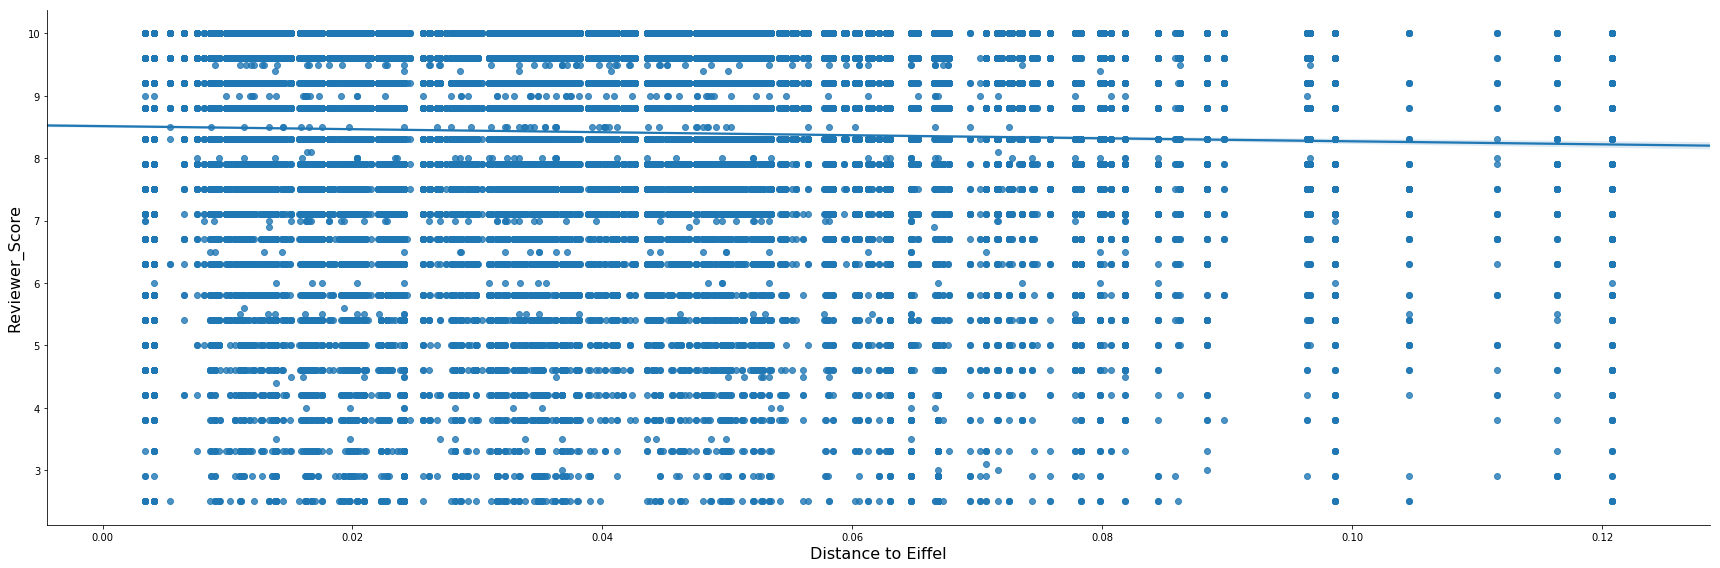

In [48]:
sns.lmplot(x='Distance to Eiffel',y = 'Reviewer_Score',data = distnscore, size = 8 ,aspect = 3 )

In [45]:
distnscore.corr()

,Distance to Eiffel,Reviewer_Score
Distance to Eiffel,1.000000,-0.031689
Reviewer_Score,-0.031689,1.000000


In [18]:
Table.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Type_of_Trip', 'Traveller_Type',
       'Room_Type', 'Number_of_Night', 'Use_Mobile'],
      dtype='object')

In [19]:
Table[['Number_of_Night','Reviewer_Score']].corr()

,Number_of_Night,Reviewer_Score
Number_of_Night,1.000000,-0.014838
Reviewer_Score,-0.014838,1.000000
